In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


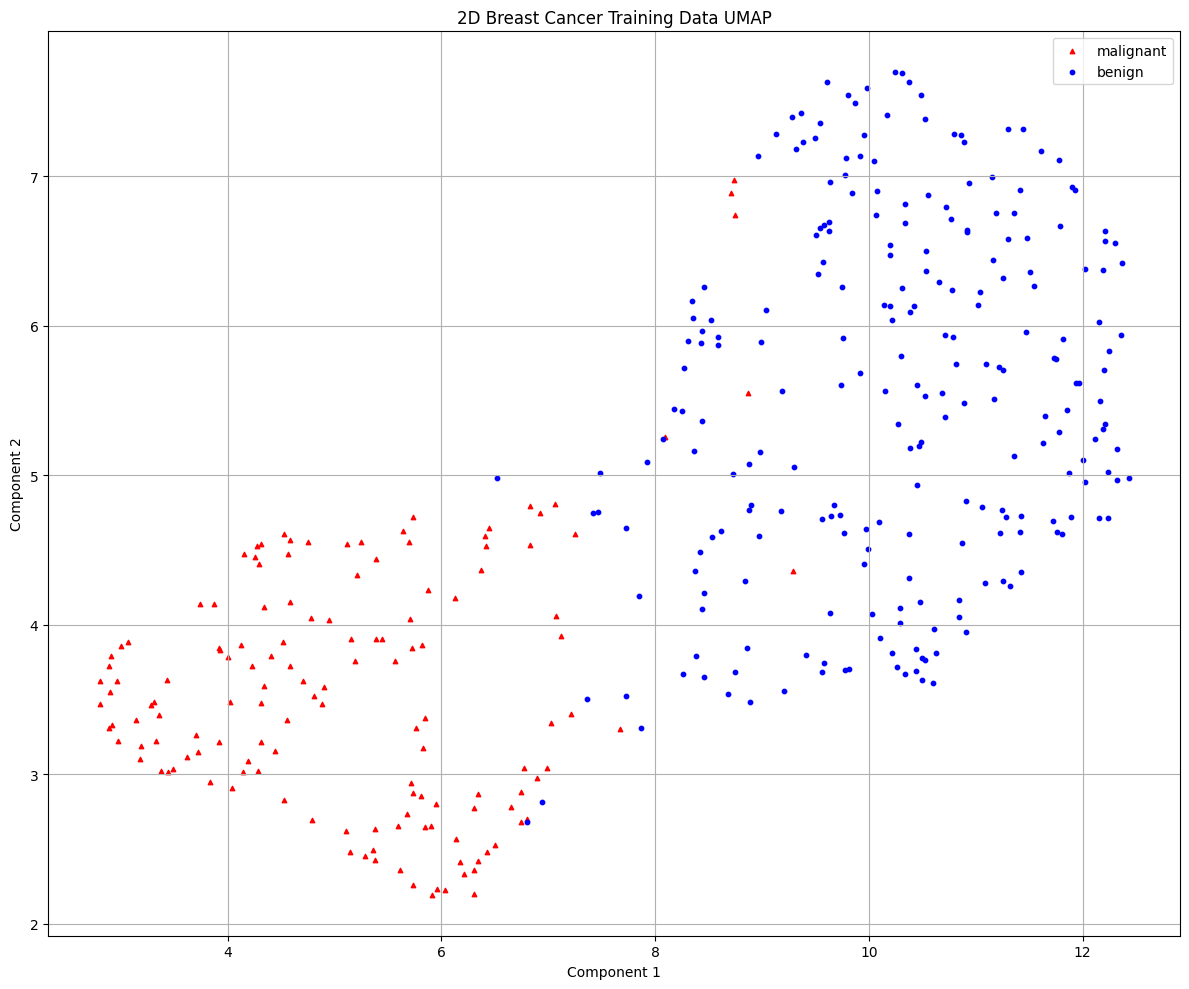

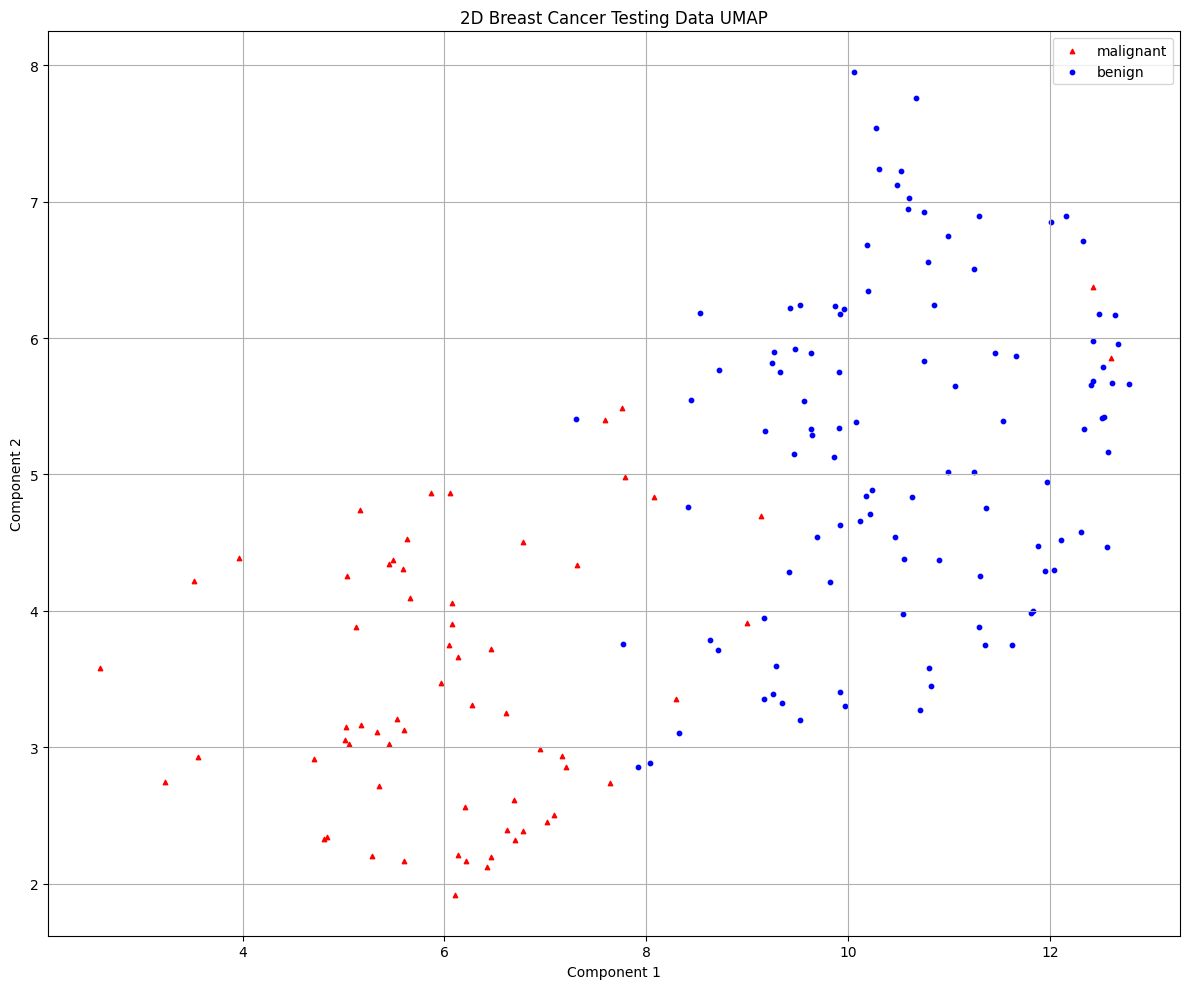

[I 2025-04-27 15:36:04,294] A new study created in memory with name: no-name-3cf2f52d-7022-48b1-9794-a4e5d4b44ba4
[I 2025-04-27 15:36:19,812] Trial 0 finished with value: 0.9657894736842106 and parameters: {'n_estimators': 1283, 'max_depth': 7, 'learning_rate': 0.0013707988678418861, 'subsample': 0.7122369422505337, 'colsample_bytree': 0.9695978044495167, 'gamma': 4.051634589607346, 'reg_alpha': 1.354219394820018e-07, 'reg_lambda': 8.341363524470883e-07}. Best is trial 0 with value: 0.9657894736842106.
[I 2025-04-27 15:36:56,411] Trial 1 finished with value: 0.95 and parameters: {'n_estimators': 1723, 'max_depth': 6, 'learning_rate': 0.004567449150204353, 'subsample': 0.7668521304672977, 'colsample_bytree': 0.5295626373530278, 'gamma': 0.2590598355388718, 'reg_alpha': 5.1287612998761004e-08, 'reg_lambda': 3.606502993965818e-05}. Best is trial 0 with value: 0.9657894736842106.
[I 2025-04-27 15:37:23,841] Trial 2 finished with value: 0.968421052631579 and parameters: {'n_estimators': 321

Best trial:
Accuracy: 0.9710526315789474
Best hyperparameters:  {'n_estimators': 10000, 'max_depth': 12, 'learning_rate': 0.018410792854674573, 'subsample': 0.6928955387596992, 'colsample_bytree': 0.5684370778583245, 'gamma': 4.325593793651902, 'reg_alpha': 0.003124359148507246, 'reg_lambda': 5.044651068191764e-05}


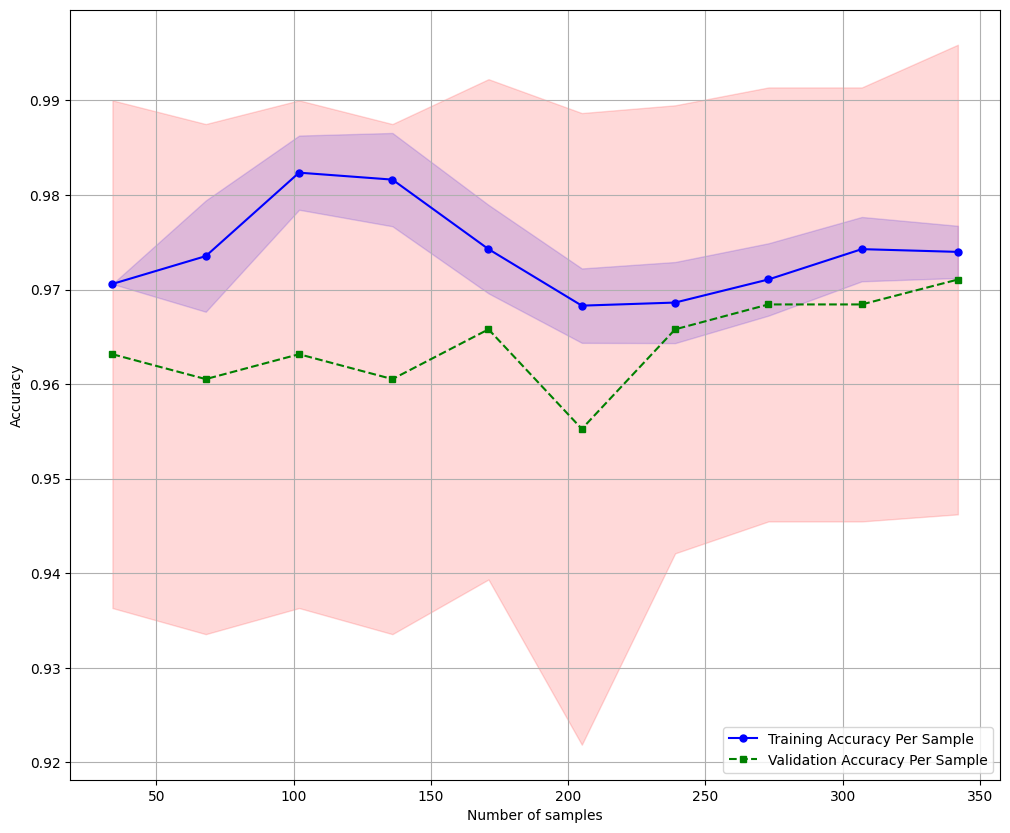

Confusion Matrix
[[ 54  10]
 [  1 106]]
Accuracy: 0.9357, Precision: 0.9138, Recall: 0.9907, F1: 0.9507, AUC: 0.9666


In [2]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)